<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy as np

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
# Load the Stack Overflow survey dataset
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
# Step 1: Check missing values in critical columns
print("Missing values in key columns:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())
print("\nPercentage of missing values:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().mean() * 100)

# Step 2: Decide on a strategy
# If the missing percentage is small, we can drop those rows. Otherwise, we fill them.

# For this example:
# - Drop rows if 'Employment' or 'JobSat' is missing (they're important for analysis)
# - Fill 'RemoteWork' with the most frequent value

# Drop rows where Employment or JobSat is missing
df = df.dropna(subset=['Employment', 'JobSat'])

# Fill missing RemoteWork values with the most common one
most_common_remote = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_common_remote)

# Step 3: Confirm changes
print("\nAfter handling missing values:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Missing values in key columns:
Employment        0
JobSat        36326
RemoteWork    10637
dtype: int64

Percentage of missing values:
Employment     0.000000
JobSat        55.495974
RemoteWork    16.250363
dtype: float64

After handling missing values:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


In [6]:
# need to replace NaN in the YearsCodePro column 
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

median_years = df['YearsCodePro'].median()
df['YearsCodePro'] = df['YearsCodePro'].fillna(median_years)

print(f"Filled YearsCodePro NaNs with median: {median_years}")
print("Remaining missing values:", df['YearsCodePro'].isnull().sum())


Filled YearsCodePro NaNs with median: 8.0
Remaining missing values: 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_438/967127317.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reindex(labels)


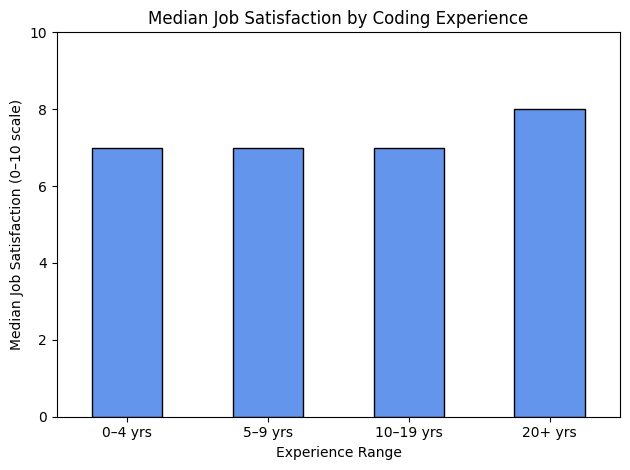

In [8]:
#write your code here

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

bins = [0, 4, 9, 19, 100]  # Covers >20 years too
labels = ['0–4 yrs', '5–9 yrs', '10–19 yrs', '20+ yrs']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)

df = df.dropna(subset=['JobSat', 'ExperienceRange'])

median_satisfaction = df.groupby('ExperienceRange')['JobSat'].median().reindex(labels)

# lets visualize
median_satisfaction.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Median Job Satisfaction by Coding Experience')
plt.xlabel('Experience Range')
plt.ylabel('Median Job Satisfaction (0–10 scale)')
plt.ylim(0, 10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_438/67847817.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='Blues')


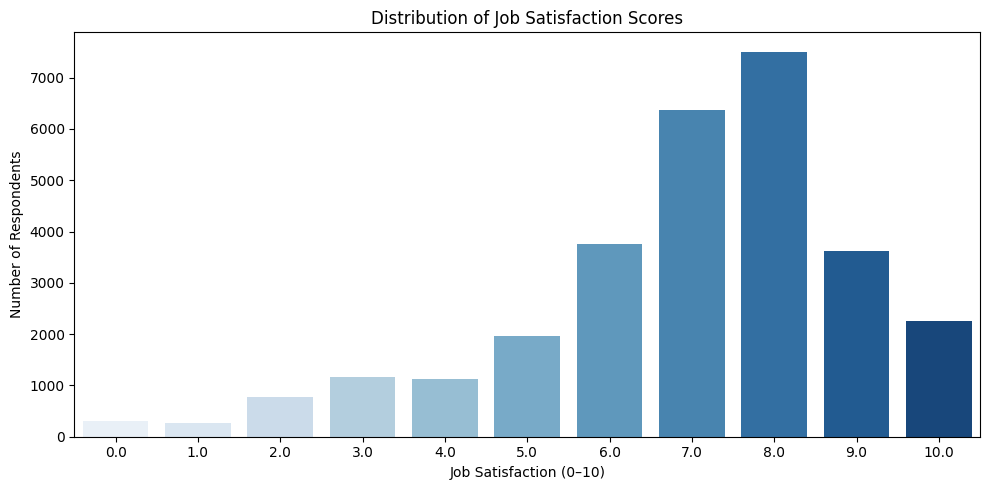

In [9]:
## write your code here

df = df.dropna(subset=['JobSat'])

# Plot count of JobSat values
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSat', data=df, palette='Blues')

plt.title('Distribution of Job Satisfaction Scores')
plt.xlabel('Job Satisfaction (0–10)')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_438/2920458188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='coolwarm')


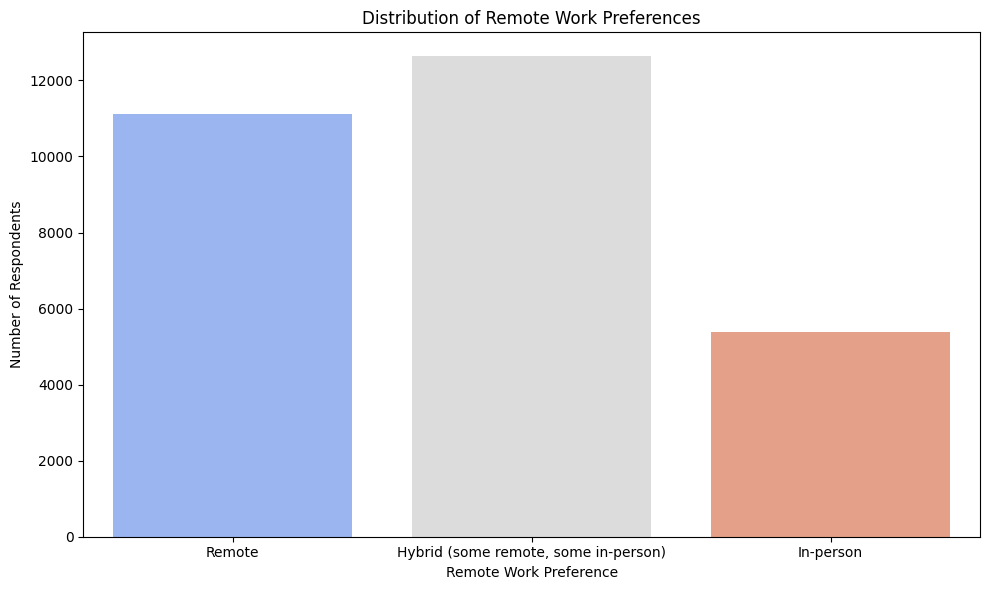


Cleaned Cross-tabulation of Remote Work by Employment Type (Percentage):
                                      Employed, full-...  Employed, full-...  \
RemoteWork                                                                     
Hybrid (some remote, some in-person)           79.236919            0.387873   
In-person                                      83.271513            0.333828   
Remote                                         72.393301            0.549253   

                                      Employed, full-...  Employed, full-...  \
RemoteWork                                                                     
Hybrid (some remote, some in-person)            6.570094            0.419536   
In-person                                       4.358309            0.166914   
Remote                                         11.048082            0.495228   

                                      Employed, full-...  Employed, full-...  \
RemoteWork                                  

In [12]:
## Write your code 

df = df.dropna(subset=['RemoteWork', 'Employment'])

plt.figure(figsize=(10, 6))
sns.countplot(x='RemoteWork', data=df, palette='coolwarm')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

remote_by_employment = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='index') * 100

remote_by_employment.columns = [col[:15] + '...' if len(col) > 15 else col for col in remote_by_employment.columns]

print("\nCleaned Cross-tabulation of Remote Work by Employment Type (Percentage):")
print(remote_by_employment)

remote_by_job_role = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='index') * 100

remote_by_job_role.columns = [col[:15] + '...' if len(col) > 15 else col for col in remote_by_job_role.columns]

print("\nCleaned Cross-tabulation of Remote Work by Job Role (Percentage):")
print(remote_by_job_role)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_438/1032284558.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Languages', data=top_languages, palette='coolwarm')


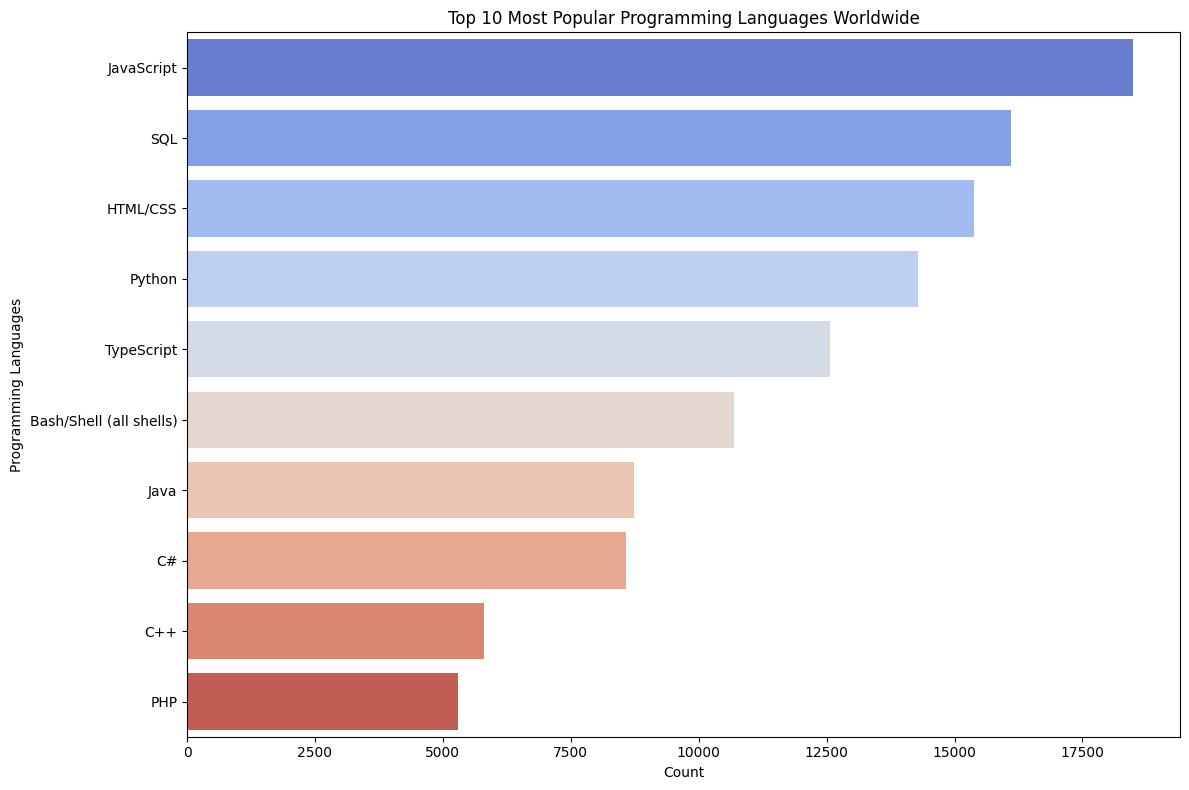

In [14]:
## Write your code 

df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('')
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')


df['Country'] = df['Country'].fillna('Unknown')
languages_by_region = df.explode('Languages')

language_counts = languages_by_region.groupby(['Country', 'Languages']).size().reset_index(name='count')
top_languages = language_counts.groupby('Languages')['count'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Languages', data=top_languages, palette='coolwarm')
plt.title('Top 10 Most Popular Programming Languages Worldwide')
plt.xlabel('Count')
plt.ylabel('Programming Languages')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


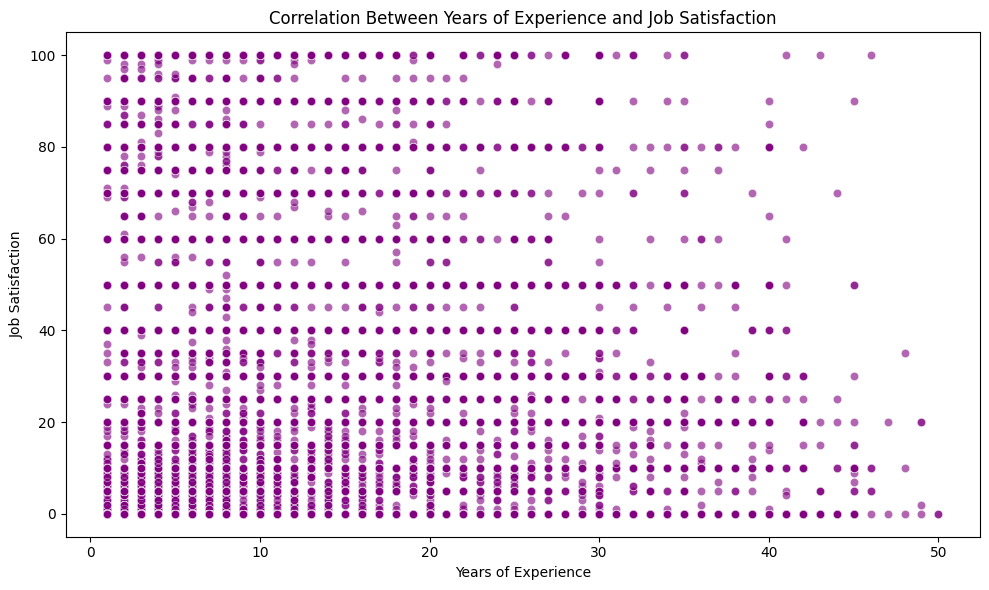

In [15]:
## Write your code 

df_cleaned = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df_cleaned, color='purple', alpha=0.6)

plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


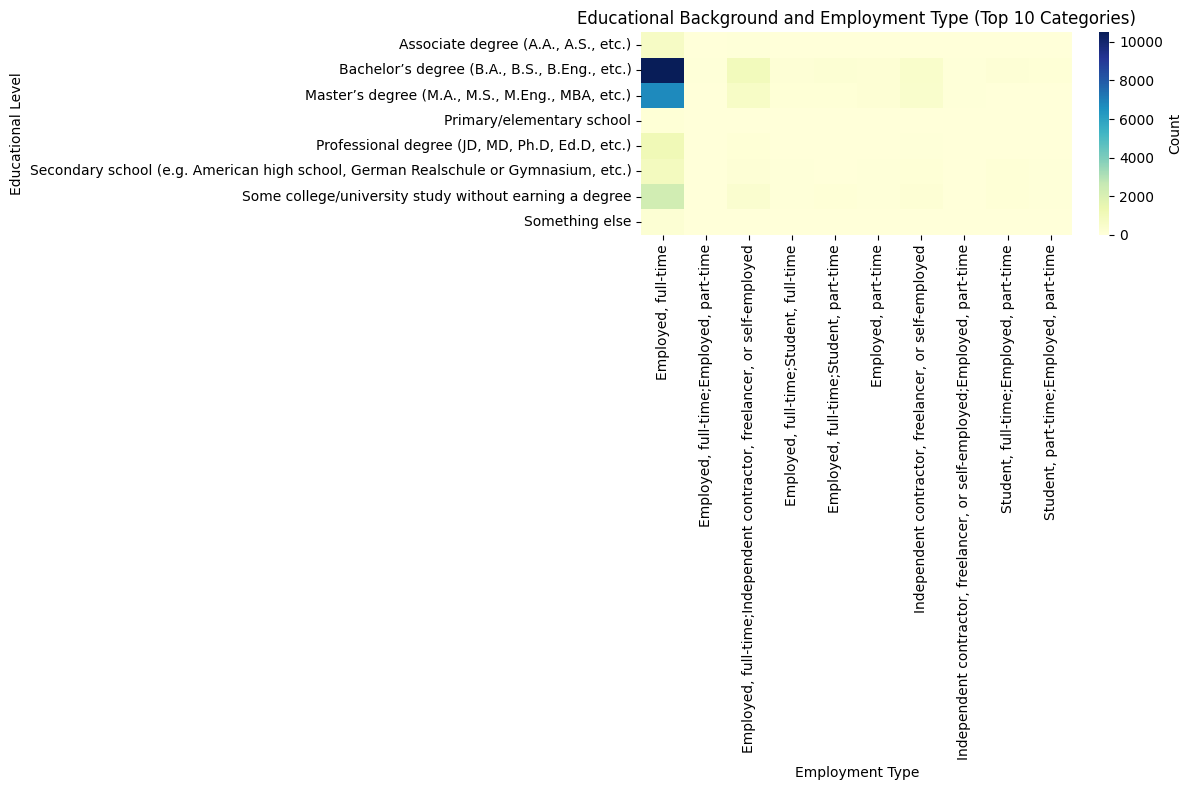

In [18]:
## Write your code here
df_cleaned = df.dropna(subset=['EdLevel', 'Employment'])

# Step 2: Select top 10 most frequent educational levels and employment types to simplify the view
top_education_levels = df_cleaned['EdLevel'].value_counts().head(10).index
top_employment_types = df_cleaned['Employment'].value_counts().head(10).index

# Step 3: Filter data to only include these top 10 categories
filtered_data = df_cleaned[df_cleaned['EdLevel'].isin(top_education_levels) & df_cleaned['Employment'].isin(top_employment_types)]

# Step 4: Cross-tabulate 'EdLevel' vs 'Employment'
edlevel_employment_crosstab = pd.crosstab(filtered_data['EdLevel'], filtered_data['Employment'])

# Step 5: Improved heatmap with a better color palette ('coolwarm' or 'viridis' for better contrast)
plt.figure(figsize=(12, 8))
sns.heatmap(edlevel_employment_crosstab, annot=False, cmap="coolwarm", cbar_kws={'label': 'Count'})
plt.title('Educational Background and Employment Type (Top 10 Categories)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
